In [33]:
# Import libraries 
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
#import xgboost as xgb
from sklearn.feature_selection import RFECV, RFE  # feature selection 
from xgboost import plot_tree  # plot Tree XGBoost
from sklearn.metrics import confusion_matrix,accuracy_score, f1_score # performance metrics
from sklearn.model_selection import cross_val_score
import plotly.graph_objs as go #visualization
import matplotlib.pyplot as plt#visualization
import seaborn as sns #visualization
import plotly.offline as py #visualization
import plotly.tools as tls #visualization
import plotly.figure_factory as ff #visualization


# Import dataset
gen_train = pd.read_csv('../data/generated/train_eng.csv')
gen_test = pd.read_csv('../data/generated/test_eng.csv')
# Define label 
X_train = gen_train.drop('label', axis = 1)
y_train = gen_train.label


# Fit Xgboost
classifier = XGBClassifier(n_estimators=300, max_depth = 12)
classifier.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=12,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [34]:
# Predict the test set results
y_pred = classifier.predict(X_train)

In [35]:
# Apply k-fold cross validation
score = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 4, scoring='f1_macro')
print('cross val: ', score.mean()) # 
print('cross val std: ', score.std()) # 

cross val:  0.9615219411070743
cross val std:  0.0017524674140693417


In [28]:
gen_train.shape

(24840, 215)

In [32]:
# Score
f1_score(y_train, y_pred, average='macro') 

# SUBMISSION 
preds = classifier.predict(gen_test)
submission = pd.read_csv('../data/sample_submission.csv')
submission['label'] = preds
submission.to_csv('submission_xgboost.csv', index=False)

ValueError: feature_names mismatch: ['Cat_Friday', 'Cat_MailType_multipart/alternative', 'Cat_MailType_multipart/idm', 'Cat_MailType_multipart/mixed', 'Cat_MailType_multipart/related', 'Cat_MailType_nan', 'Cat_MailType_text/html', 'Cat_MailType_text/plain', 'Cat_Monday', 'Cat_Saturday', 'Cat_Sunday', 'Cat_Thursday', 'Cat_Tuesday', 'Cat_Wednesday', 'Cat_Year_2012', 'Cat_Year_2013', 'Cat_Year_2014', 'Cat_Year_2015', 'Cat_Year_2016', 'Cat_Year_2017', 'Cat_Year_2018', 'Cat_Year_2019', 'Cat_bcced', 'Cat_ccs', 'Cat_designation', 'Cat_forum_sender', 'Cat_forum_sender_only', 'Cat_promo_and_update_sender', 'Cat_promo_only_sender', 'Cat_promo_sender', 'Cat_salutations', 'Cat_social_sender', 'Cat_social_sender_only', 'Cat_update_only_sender', 'Cat_update_sender', 'CountByMonth', 'CountByWeek', 'Null_sender', 'SenderTimeZoneDif', 'chars_in_body', 'chars_in_subject', 'images', 'senderByMonth_chars_in_body_mean', 'senderByMonth_chars_in_body_std', 'senderByMonth_chars_in_subject_mean', 'senderByMonth_chars_in_subject_std', 'senderByMonth_images_mean', 'senderByMonth_images_std', 'senderByMonth_urls_mean', 'senderByMonth_urls_std', 'senderByWeek_chars_in_body_mean', 'senderByWeek_chars_in_body_std', 'senderByWeek_chars_in_subject_mean', 'senderByWeek_chars_in_subject_std', 'senderByWeek_images_mean', 'senderByWeek_images_std', 'senderByWeek_urls_mean', 'senderByWeek_urls_std', 'sender_chars_in_body_mean', 'sender_chars_in_body_std', 'sender_chars_in_subject_mean', 'sender_chars_in_subject_std', 'sender_count', 'sender_depth', 'sender_images_mean', 'sender_images_std', 'sender_urls_mean', 'sender_urls_std', 'urls'] ['Cat_Friday', 'Cat_FridayCat_Hour_bucket_0', 'Cat_FridayCat_Hour_bucket_1', 'Cat_FridayCat_Hour_bucket_2', 'Cat_FridayCat_Hour_bucket_3', 'Cat_Hour_bucket_0', 'Cat_Hour_bucket_1', 'Cat_Hour_bucket_2', 'Cat_Hour_bucket_3', 'Cat_MailType_multipart/alternative', 'Cat_MailType_multipart/idm', 'Cat_MailType_multipart/mixed', 'Cat_MailType_multipart/related', 'Cat_MailType_nan', 'Cat_MailType_text/html', 'Cat_MailType_text/plain', 'Cat_Monday', 'Cat_MondayCat_Hour_bucket_0', 'Cat_MondayCat_Hour_bucket_1', 'Cat_MondayCat_Hour_bucket_2', 'Cat_MondayCat_Hour_bucket_3', 'Cat_Saturday', 'Cat_SaturdayCat_Hour_bucket_0', 'Cat_SaturdayCat_Hour_bucket_1', 'Cat_SaturdayCat_Hour_bucket_2', 'Cat_SaturdayCat_Hour_bucket_3', 'Cat_Sunday', 'Cat_SundayCat_Hour_bucket_0', 'Cat_SundayCat_Hour_bucket_1', 'Cat_SundayCat_Hour_bucket_2', 'Cat_SundayCat_Hour_bucket_3', 'Cat_Thursday', 'Cat_ThursdayCat_Hour_bucket_0', 'Cat_ThursdayCat_Hour_bucket_1', 'Cat_ThursdayCat_Hour_bucket_2', 'Cat_ThursdayCat_Hour_bucket_3', 'Cat_Trim_1', 'Cat_Trim_2', 'Cat_Trim_3', 'Cat_Trim_4', 'Cat_Tuesday', 'Cat_TuesdayCat_Hour_bucket_0', 'Cat_TuesdayCat_Hour_bucket_1', 'Cat_TuesdayCat_Hour_bucket_2', 'Cat_TuesdayCat_Hour_bucket_3', 'Cat_Wednesday', 'Cat_WednesdayCat_Hour_bucket_0', 'Cat_WednesdayCat_Hour_bucket_1', 'Cat_WednesdayCat_Hour_bucket_2', 'Cat_WednesdayCat_Hour_bucket_3', 'Cat_Year_2012', 'Cat_Year_2012Cat_Trim_1', 'Cat_Year_2012Cat_Trim_2', 'Cat_Year_2012Cat_Trim_3', 'Cat_Year_2012Cat_Trim_4', 'Cat_Year_2013', 'Cat_Year_2013Cat_Trim_1', 'Cat_Year_2013Cat_Trim_2', 'Cat_Year_2013Cat_Trim_3', 'Cat_Year_2013Cat_Trim_4', 'Cat_Year_2014', 'Cat_Year_2014Cat_Trim_1', 'Cat_Year_2014Cat_Trim_2', 'Cat_Year_2014Cat_Trim_3', 'Cat_Year_2014Cat_Trim_4', 'Cat_Year_2015', 'Cat_Year_2015Cat_Trim_1', 'Cat_Year_2015Cat_Trim_2', 'Cat_Year_2015Cat_Trim_3', 'Cat_Year_2015Cat_Trim_4', 'Cat_Year_2016', 'Cat_Year_2016Cat_Trim_1', 'Cat_Year_2016Cat_Trim_2', 'Cat_Year_2016Cat_Trim_3', 'Cat_Year_2016Cat_Trim_4', 'Cat_Year_2017', 'Cat_Year_2017Cat_Trim_1', 'Cat_Year_2017Cat_Trim_2', 'Cat_Year_2017Cat_Trim_3', 'Cat_Year_2017Cat_Trim_4', 'Cat_Year_2018', 'Cat_Year_2018Cat_Trim_1', 'Cat_Year_2018Cat_Trim_2', 'Cat_Year_2018Cat_Trim_3', 'Cat_Year_2018Cat_Trim_4', 'Cat_Year_2019', 'Cat_Year_2019Cat_Trim_1', 'Cat_Year_2019Cat_Trim_2', 'Cat_Year_2019Cat_Trim_3', 'Cat_Year_2019Cat_Trim_4', 'Cat_bcced', 'Cat_ccs', 'Cat_designation', 'Cat_forum_sender', 'Cat_forum_sender_only', 'Cat_promo_and_update_sender', 'Cat_promo_only_sender', 'Cat_promo_sender', 'Cat_salutations', 'Cat_social_sender', 'Cat_social_sender_only', 'Cat_update_only_sender', 'Cat_update_sender', 'CountByMonth', 'CountByWeek', 'Null_sender', 'SenderTimeZoneDif', 'chars_in_body', 'chars_in_subject', 'gapByMonth_Day_mean', 'gapByMonth_Hour_mean', 'gapByMonth_Minute_mean', 'gapByMonth_Week_mean', 'gapByMonth_ccs_mean', 'gapByMonth_chars_in_body_mean', 'gapByMonth_chars_in_subject_mean', 'gapByMonth_images_mean', 'gapByMonth_urls_mean', 'gapByWeek_Day_mean', 'gapByWeek_Hour_mean', 'gapByWeek_Minute_mean', 'gapByWeek_ccs_mean', 'gapByWeek_chars_in_body_mean', 'gapByWeek_chars_in_subject_mean', 'gapByWeek_images_mean', 'gapByWeek_urls_mean', 'gap_Day_mean', 'gap_Hour_mean', 'gap_Minute_mean', 'gap_Month_mean', 'gap_Week_mean', 'gap_Year_mean', 'gap_ccs_mean', 'gap_chars_in_body_mean', 'gap_chars_in_subject_mean', 'gap_images_mean', 'gap_urls_mean', 'images', 'ratio_gapByMonth_Day_std', 'ratio_gapByMonth_Hour_std', 'ratio_gapByMonth_Minute_std', 'ratio_gapByMonth_Week_std', 'ratio_gapByMonth_ccs_std', 'ratio_gapByMonth_chars_in_body_std', 'ratio_gapByMonth_chars_in_subject_std', 'ratio_gapByMonth_images_std', 'ratio_gapByMonth_urls_std', 'ratio_gapByWeek_Day_std', 'ratio_gapByWeek_Hour_std', 'ratio_gapByWeek_Minute_std', 'ratio_gapByWeek_ccs_std', 'ratio_gapByWeek_chars_in_body_std', 'ratio_gapByWeek_chars_in_subject_std', 'ratio_gapByWeek_images_std', 'ratio_gapByWeek_urls_std', 'ratio_gap_Day_std', 'ratio_gap_Hour_std', 'ratio_gap_Minute_std', 'ratio_gap_Month_std', 'ratio_gap_Week_std', 'ratio_gap_Year_std', 'ratio_gap_ccs_std', 'ratio_gap_chars_in_body_std', 'ratio_gap_chars_in_subject_std', 'ratio_gap_images_std', 'ratio_gap_urls_std', 'senderByMonth_Day_mean', 'senderByMonth_Day_std', 'senderByMonth_Hour_mean', 'senderByMonth_Hour_std', 'senderByMonth_Minute_mean', 'senderByMonth_Minute_std', 'senderByMonth_Week_mean', 'senderByMonth_Week_std', 'senderByMonth_ccs_mean', 'senderByMonth_ccs_std', 'senderByMonth_chars_in_body_mean', 'senderByMonth_chars_in_body_std', 'senderByMonth_chars_in_subject_mean', 'senderByMonth_chars_in_subject_std', 'senderByMonth_images_mean', 'senderByMonth_images_std', 'senderByMonth_urls_mean', 'senderByMonth_urls_std', 'senderByWeek_Day_mean', 'senderByWeek_Day_std', 'senderByWeek_Hour_mean', 'senderByWeek_Hour_std', 'senderByWeek_Minute_mean', 'senderByWeek_Minute_std', 'senderByWeek_ccs_mean', 'senderByWeek_ccs_std', 'senderByWeek_chars_in_body_mean', 'senderByWeek_chars_in_body_std', 'senderByWeek_chars_in_subject_mean', 'senderByWeek_chars_in_subject_std', 'senderByWeek_images_mean', 'senderByWeek_images_std', 'senderByWeek_urls_mean', 'senderByWeek_urls_std', 'sender_Day_mean', 'sender_Day_std', 'sender_Hour_mean', 'sender_Hour_std', 'sender_Minute_mean', 'sender_Minute_std', 'sender_Month_mean', 'sender_Month_std', 'sender_Week_mean', 'sender_Week_std', 'sender_Year_mean', 'sender_Year_std', 'sender_ccs_mean', 'sender_ccs_std', 'sender_chars_in_body_mean', 'sender_chars_in_body_std', 'sender_chars_in_subject_mean', 'sender_chars_in_subject_std', 'sender_count', 'sender_depth', 'sender_images_mean', 'sender_images_std', 'sender_urls_mean', 'sender_urls_std', 'urls']
training data did not have the following fields: Cat_Year_2015Cat_Trim_3, gap_Week_mean, senderByMonth_Hour_mean, gap_Hour_mean, Cat_Year_2014Cat_Trim_1, sender_Minute_std, gapByWeek_chars_in_subject_mean, Cat_Year_2017Cat_Trim_2, gapByMonth_Minute_mean, Cat_WednesdayCat_Hour_bucket_1, Cat_SundayCat_Hour_bucket_3, Cat_Year_2016Cat_Trim_2, Cat_Hour_bucket_1, ratio_gapByWeek_Hour_std, ratio_gapByWeek_urls_std, senderByWeek_Day_std, gap_Year_mean, Cat_Year_2014Cat_Trim_3, gapByMonth_chars_in_subject_mean, Cat_Year_2013Cat_Trim_2, Cat_Year_2018Cat_Trim_2, gap_Month_mean, ratio_gap_Hour_std, gap_ccs_mean, gapByMonth_Week_mean, Cat_Year_2013Cat_Trim_1, Cat_WednesdayCat_Hour_bucket_3, ratio_gap_chars_in_subject_std, ratio_gapByMonth_chars_in_body_std, Cat_SaturdayCat_Hour_bucket_1, ratio_gapByMonth_images_std, gap_images_mean, Cat_Hour_bucket_3, ratio_gapByMonth_urls_std, gap_chars_in_subject_mean, Cat_Year_2015Cat_Trim_4, Cat_TuesdayCat_Hour_bucket_2, ratio_gapByWeek_images_std, Cat_Year_2013Cat_Trim_3, ratio_gapByMonth_Week_std, senderByWeek_Minute_std, Cat_Year_2018Cat_Trim_4, Cat_ThursdayCat_Hour_bucket_3, Cat_Year_2016Cat_Trim_1, gapByWeek_urls_mean, gapByWeek_Day_mean, Cat_Trim_3, senderByMonth_Minute_mean, gap_Day_mean, ratio_gap_ccs_std, Cat_MondayCat_Hour_bucket_3, Cat_Year_2018Cat_Trim_3, gap_Minute_mean, sender_Hour_mean, ratio_gap_Year_std, Cat_WednesdayCat_Hour_bucket_0, Cat_Hour_bucket_2, Cat_MondayCat_Hour_bucket_2, Cat_Hour_bucket_0, gapByMonth_Hour_mean, Cat_SundayCat_Hour_bucket_1, Cat_Year_2014Cat_Trim_4, gapByWeek_Hour_mean, ratio_gapByMonth_ccs_std, ratio_gapByMonth_Day_std, Cat_MondayCat_Hour_bucket_0, Cat_Year_2012Cat_Trim_1, sender_ccs_std, Cat_Year_2015Cat_Trim_2, gapByWeek_images_mean, sender_Month_mean, ratio_gap_urls_std, Cat_FridayCat_Hour_bucket_3, Cat_SundayCat_Hour_bucket_2, Cat_Year_2012Cat_Trim_2, senderByMonth_Day_mean, Cat_FridayCat_Hour_bucket_0, gap_urls_mean, Cat_Year_2016Cat_Trim_4, Cat_FridayCat_Hour_bucket_1, sender_Minute_mean, sender_Month_std, sender_Week_std, ratio_gap_Minute_std, ratio_gapByMonth_Hour_std, senderByMonth_ccs_std, senderByWeek_ccs_std, Cat_Year_2013Cat_Trim_4, Cat_SaturdayCat_Hour_bucket_0, ratio_gapByWeek_chars_in_subject_std, Cat_Year_2019Cat_Trim_3, Cat_ThursdayCat_Hour_bucket_0, senderByWeek_Day_mean, Cat_Year_2019Cat_Trim_4, gapByMonth_chars_in_body_mean, Cat_Year_2017Cat_Trim_1, Cat_Year_2014Cat_Trim_2, ratio_gapByMonth_chars_in_subject_std, Cat_SaturdayCat_Hour_bucket_2, Cat_FridayCat_Hour_bucket_2, Cat_Year_2017Cat_Trim_4, ratio_gapByWeek_Minute_std, ratio_gap_Month_std, gapByMonth_ccs_mean, ratio_gap_images_std, senderByWeek_Hour_std, ratio_gapByWeek_ccs_std, sender_Week_mean, Cat_Trim_1, sender_Day_mean, Cat_TuesdayCat_Hour_bucket_3, ratio_gapByWeek_chars_in_body_std, Cat_WednesdayCat_Hour_bucket_2, Cat_Year_2012Cat_Trim_4, sender_Year_mean, sender_Year_std, Cat_Year_2019Cat_Trim_1, Cat_Year_2016Cat_Trim_3, senderByMonth_Week_std, Cat_TuesdayCat_Hour_bucket_0, sender_Day_std, sender_ccs_mean, ratio_gapByMonth_Minute_std, Cat_Trim_4, Cat_ThursdayCat_Hour_bucket_1, ratio_gap_Week_std, Cat_MondayCat_Hour_bucket_1, Cat_SundayCat_Hour_bucket_0, gapByWeek_chars_in_body_mean, gapByWeek_ccs_mean, Cat_Year_2012Cat_Trim_3, Cat_Year_2015Cat_Trim_1, Cat_Year_2019Cat_Trim_2, ratio_gap_chars_in_body_std, senderByWeek_Hour_mean, senderByMonth_Week_mean, gapByWeek_Minute_mean, senderByMonth_Hour_std, gapByMonth_images_mean, Cat_SaturdayCat_Hour_bucket_3, sender_Hour_std, Cat_ThursdayCat_Hour_bucket_2, ratio_gapByWeek_Day_std, senderByMonth_ccs_mean, Cat_TuesdayCat_Hour_bucket_1, senderByWeek_ccs_mean, gapByMonth_urls_mean, senderByWeek_Minute_mean, Cat_Year_2018Cat_Trim_1, gapByMonth_Day_mean, Cat_Year_2017Cat_Trim_3, gap_chars_in_body_mean, ratio_gap_Day_std, senderByMonth_Day_std, senderByMonth_Minute_std, Cat_Trim_2

In [24]:
X_train.shape

(24840, 213)

"\n# 'weight' feature importance \nxgb.plot_importance(classifier , importance_type='weight')\nplt.title('importance', fontsize = 20)\nplt.yticks(fontsize = 10)\nplt.ylabel('features', fontsize = 20)\n"

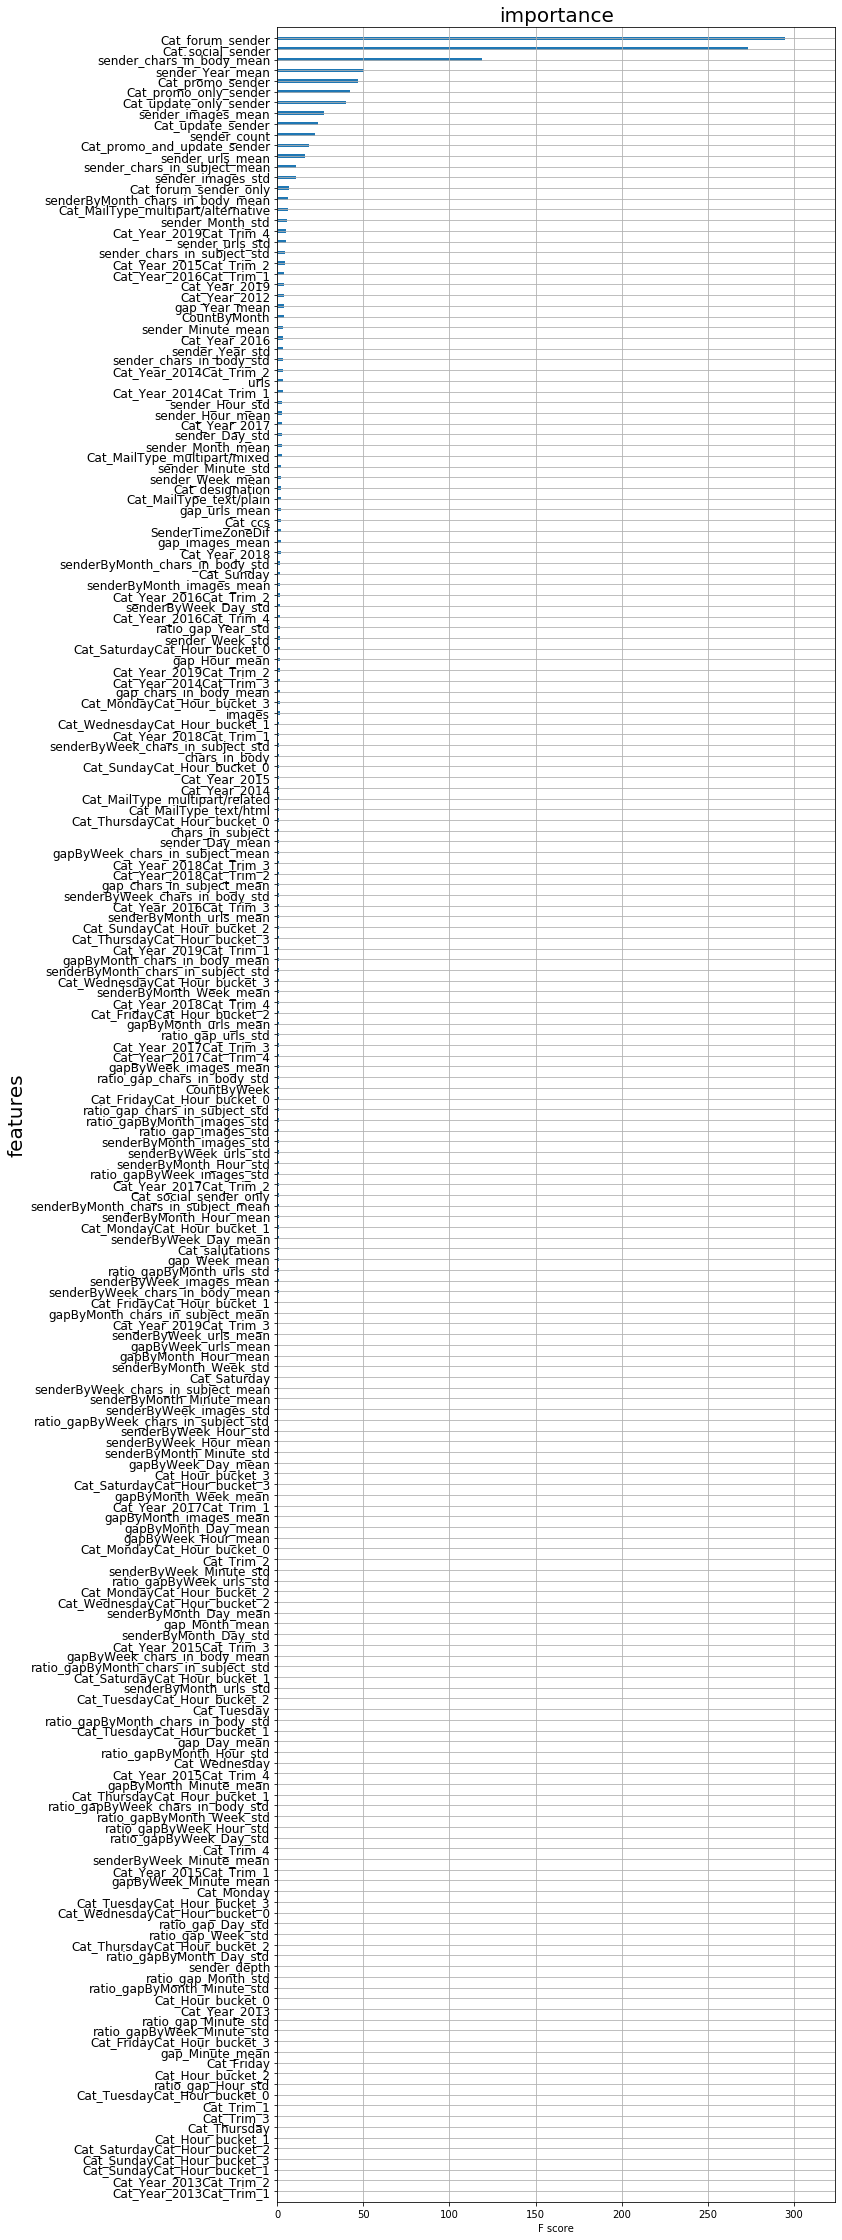

In [18]:
########  Feature importance 

### Feature Importance type = 'gain'
plt.figure(figsize = (10,40))
ax = plt.subplot()
xgb.plot_importance(classifier, importance_type='gain', ax=ax, height= 0.3, show_values=False), 
plt.title('importance', fontsize = 20)
plt.yticks(fontsize = 12)
plt.ylabel('features', fontsize = 20)
"""
# 'weight' feature importance 
xgb.plot_importance(classifier , importance_type='weight')
plt.title('importance', fontsize = 20)
plt.yticks(fontsize = 10)
plt.ylabel('features', fontsize = 20)
"""

Text(0, 0.5, 'features')

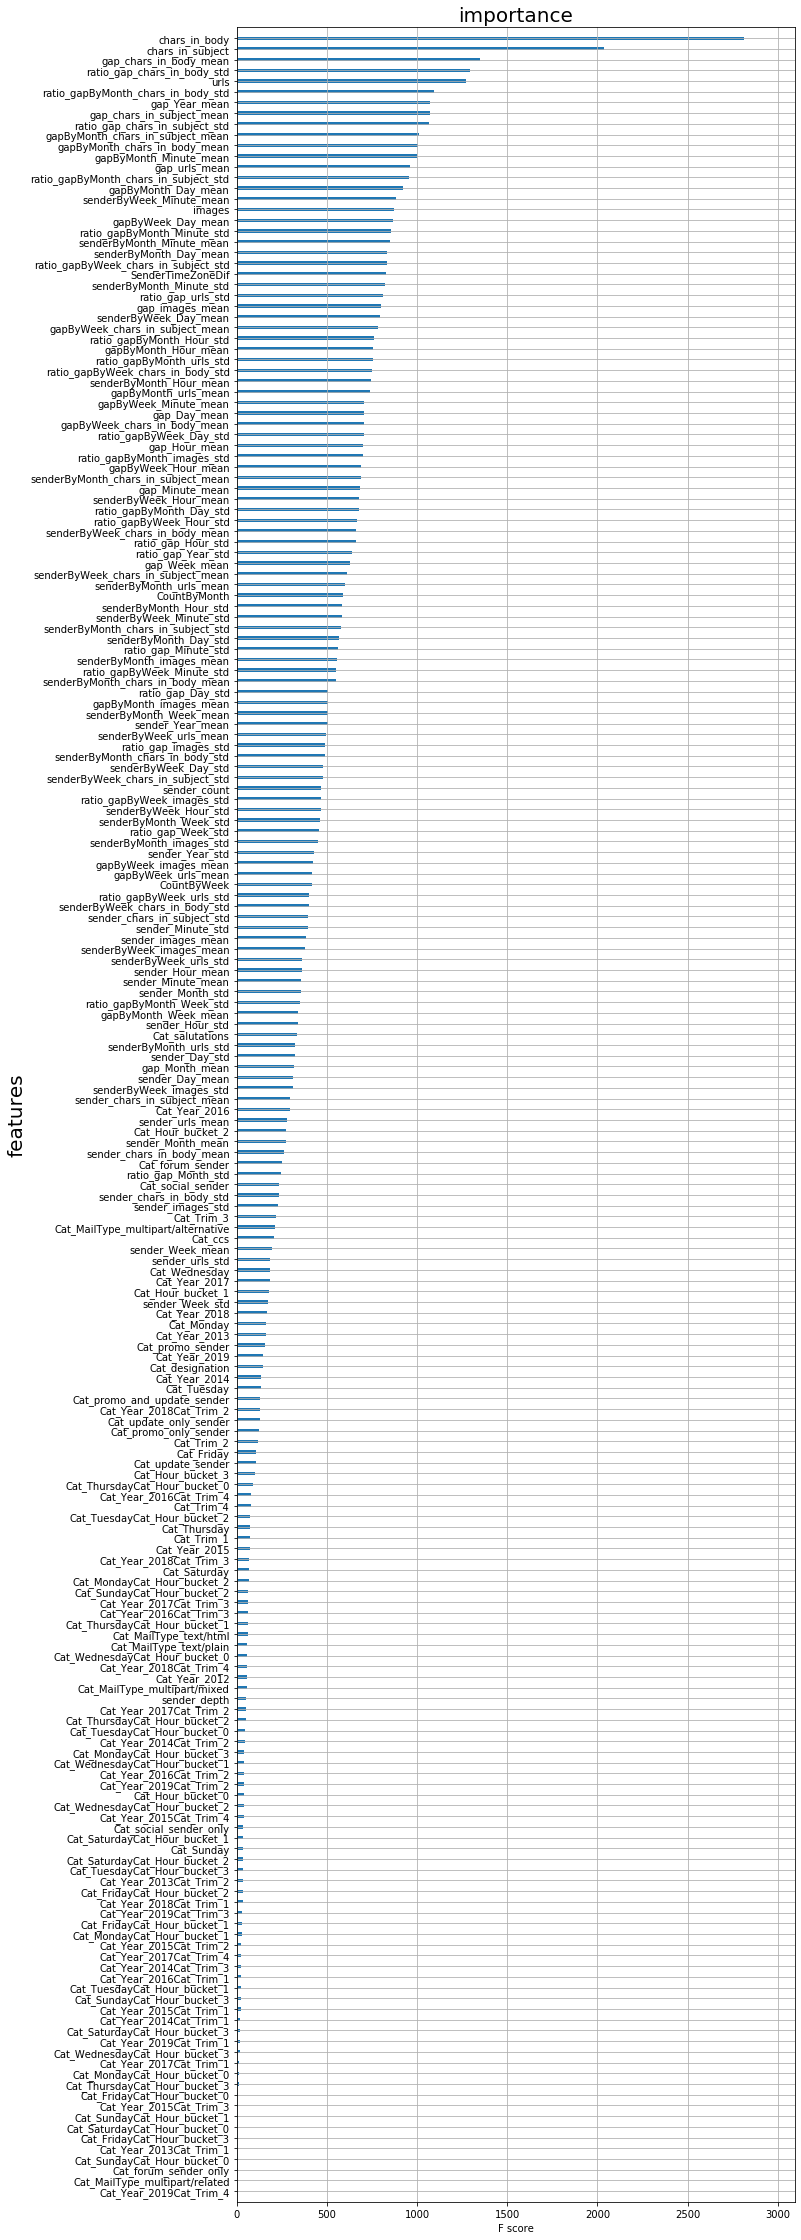

In [20]:

# 'weight' feature importance 
plt.figure(figsize = (10,40))
ax = plt.subplot()
xgb.plot_importance(classifier , importance_type='weight', ax=ax, height= 0.3, show_values=False)
plt.title('importance', fontsize = 20)
plt.yticks(fontsize = 10)
plt.ylabel('features', fontsize = 20)

In [ ]:
# Recursive Feature elimination (RFE), only informative.  
rfe = RFE(classifier, n_features_to_select = 1)
X_opt2 = rfe.fit_transform(X_train, y_train)
print(rfe.ranking_)
rfe_rank = rfe.ranking_
features= X_train.columns.tolist()
feat_imp = []
for i in range(0, len(features)): 
    feat_imp.append((rfe_rank[i], features[i]))
# Obtain a ranking of feature importance
sorted(feat_imp)

In [7]:
# Applying Grid Search CV to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators':[300, 400], 'max_depth':[12]}] 
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'f1_macro',
                           cv = 4)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print(best_accuracy, best_parameters)

KeyboardInterrupt: 